## Lab | Web Scraping Single Page

In [183]:
from bs4 import BeautifulSoup
#pip install bs4

In [184]:
import requests

r = requests.get('https://www.billboard.com/charts/hot-100/')
r.status_code

200

In [185]:
html = r.content

<!DOCTYPE html>

<!--[if IE 6]>
<html id="ie6" lang="en-US">
<![endif]-->
<!--[if IE 7]>
<html id="ie7" lang="en-US">
<![endif]-->
<!--[if IE 8]>
<html id="ie8" lang="en-US">
<![endif]-->
<!--[if !(IE 6) | !(IE 7) | !(IE 8) ]><!-->
<html lang="en-US">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="#ffffff" name="theme-color"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport">
<!-- Add to home screen for iOS -->
<meta content="black-translucent" name="apple-mobile-web-app-status-bar-style"/>
<link href="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/icons/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
<!-- Tile icons for Windows -->
<meta content="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/browserconfig.xml" name="msapplication-config"/>
<meta content="https://www.billboard.com/wp-content/themes/vip/pmc-bil
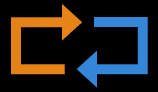

In [186]:
soup = BeautifulSoup(html, 'html.parser')
soup

In [187]:
containers = soup.find_all('div', attrs = {'class': 'o-chart-results-list-row-container'})
len(containers)

100

In [188]:
print(containers[0].prettify())

<div class="o-chart-results-list-row-container">
 <ul class="o-chart-results-list-row // lrv-a-unstyle-list lrv-u-flex u-height-200 u-height-100@mobile-max u-height-100@tablet-only lrv-u-background-color-white a-chart-has-chart-detail" data-ajax="" data-detail-target="1">
  <li class="o-chart-results-list__item // lrv-u-background-color-black lrv-u-color-white u-width-100 u-width-55@mobile-max u-width-55@tablet-only lrv-u-height-100p lrv-u-flex lrv-u-flex-direction-column@mobile-max lrv-u-flex-shrink-0 lrv-u-align-items-center lrv-u-justify-content-center lrv-u-border-b-1 u-border-b-0@mobile-max lrv-u-border-color-grey">
   <span class="c-label a-font-primary-bold-l u-font-size-32@tablet u-letter-spacing-0080@tablet">
    1
   </span>
   <div class="c-svg u-height-10@mobile-max u-width-10@mobile-max u-hidden@tablet">
    <svg height="10.157" width="10.157" xmlns="http://www.w3.org/2000/svg">
     <path d="M7.727 5.732H0V4.426h7.727L4.322.923 5.219 0l4.938 5.079-4.938 5.079-.9-.923z" da

In [189]:
BillboardHot100 = []

for container in containers:
    song_name = container.find("h3").get_text(strip=True)
    artist_name = container.find("li", attrs = {"class": "lrv-u-width-100p"}).find("span").get_text(strip=True)
    BillboardHot100.append((song_name, artist_name))
    
    print(song_name, "_", artist_name, "\n")
    

Flowers _ Miley Cyrus 

Kill Bill _ SZA 

Creepin' _ Metro Boomin, The Weeknd & 21 Savage 

Boy's A Liar, Pt. 2 _ PinkPantheress & Ice Spice 

Last Night _ Morgan Wallen 

Unholy _ Sam Smith & Kim Petras 

Die For You _ The Weeknd 

Anti-Hero _ Taylor Swift 

Cuff It _ Beyonce 

I'm Good (Blue) _ David Guetta & Bebe Rexha 

Just Wanna Rock _ Lil Uzi Vert 

As It Was _ Harry Styles 

Thank God _ Kane Brown With Katelyn Brown 

Rich Flex _ Drake & 21 Savage 

Love You Anyway _ Luke Combs 

Thought You Should Know _ Morgan Wallen 

Under The Influence _ Chris Brown 

Rock And A Hard Place _ Bailey Zimmerman 

Golden Hour _ JVKE 

Made You Look _ Meghan Trainor 

Something In The Orange _ Zach Bryan 

Players _ Coi Leray 

You Proof _ Morgan Wallen 

Lavender Haze _ Taylor Swift 

Calm Down _ Rema & Selena Gomez 

Escapism _ RAYE Featuring 070 Shake 

Going, Going, Gone _ Luke Combs 

Bad Habit _ Steve Lacy 

Superhero (Heroes & Villains) _ Metro Boomin, Future & Chris Brown 

Shirt _ SZA 

In [190]:
import pandas as pd

billboard100 = pd.DataFrame(BillboardHot100, columns=["song_name", "artist_name"])
billboard100

,song_name,artist_name
0,Flowers,Miley Cyrus
1,Kill Bill,SZA
2,Creepin',"Metro Boomin, The Weeknd & 21 Savage"
3,"Boy's A Liar, Pt. 2",PinkPantheress & Ice Spice
4,Last Night,Morgan Wallen
...,...,...
95,Next Thing You Know,Jordan Davis
96,Too Many Nights,Metro Boomin Featuring Don Toliver & Future
97,Gato de Noche,Nengo Flow & Bad Bunny
98,Painting Pictures,Superstar Pride


## Lab | Web Scraping Multiple Pages

In [191]:
import math

In [192]:
r = requests.get('https://en.wikipedia.org/wiki/List_of_U.S._state_songs')
r.status_code

200

In [193]:
r.headers

{'date': 'Sat, 25 Feb 2023 18:35:06 GMT', 'server': 'mw1418.eqiad.wmnet', 'x-content-type-options': 'nosniff', 'content-language': 'en', 'vary': 'Accept-Encoding,Cookie,Authorization', 'last-modified': 'Tue, 21 Feb 2023 14:31:02 GMT', 'content-type': 'text/html; charset=UTF-8', 'content-encoding': 'gzip', 'age': '14035', 'x-cache': 'cp3058 hit, cp3056 miss', 'x-cache-status': 'hit-local', 'server-timing': 'cache;desc="hit-local", host;desc="cp3056"', 'strict-transport-security': 'max-age=106384710; includeSubDomains; preload', 'report-to': '{ "group": "wm_nel", "max_age": 604800, "endpoints": [{ "url": "https://intake-logging.wikimedia.org/v1/events?stream=w3c.reportingapi.network_error&schema_uri=/w3c/reportingapi/network_error/1.0.0" }] }', 'nel': '{ "report_to": "wm_nel", "max_age": 604800, "failure_fraction": 0.05, "success_fraction": 0.0}', 'set-cookie': 'WMF-Last-Access=25-Feb-2023;Path=/;HttpOnly;secure;Expires=Wed, 29 Mar 2023 12:00:00 GMT, WMF-Last-Access-Global=25-Feb-2023;Pa

In [194]:
r.cookies

<RequestsCookieJar[Cookie(version=0, name='GeoIP', value='NL:NH:Zaandam:52.44:4.83:v4', port=None, port_specified=False, domain='.wikipedia.org', domain_specified=True, domain_initial_dot=True, path='/', path_specified=True, secure=True, expires=None, discard=True, comment=None, comment_url=None, rest={}, rfc2109=False), Cookie(version=0, name='WMF-Last-Access-Global', value='25-Feb-2023', port=None, port_specified=False, domain='.wikipedia.org', domain_specified=True, domain_initial_dot=True, path='/', path_specified=True, secure=True, expires=1680091200, discard=False, comment=None, comment_url=None, rest={'HttpOnly': None}, rfc2109=False), Cookie(version=0, name='WMF-DP', value='dfb', port=None, port_specified=False, domain='en.wikipedia.org', domain_specified=False, domain_initial_dot=False, path='/', path_specified=True, secure=True, expires=1677369600, discard=False, comment=None, comment_url=None, rest={'HttpOnly': None}, rfc2109=False), Cookie(version=0, name='WMF-Last-Access',

In [195]:
html = r.content
html

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-disabled vector-feature-page-tools-pinned-disabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>List of U.S. state songs - Wikipedia</title>\n<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-disabled vector-feature-page-tools-pinned-disabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled";(function(){var cookie=docum

In [196]:
soup = BeautifulSoup(html, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-disabled vector-feature-page-tools-pinned-disabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of U.S. state songs - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-disabled vector-feature-page-tools-pinned-disabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled";(function(){var c

In [197]:
html_table = soup.find('table', attrs={'class': 'wikitable sortable plainrowheaders'})

In [198]:
html_table

<table class="wikitable sortable plainrowheaders">
<tbody><tr>
<th scope="col" style="width:15%;">State
</th>
<th scope="col">State song
</th>
<th scope="col">Composer(s)
</th>
<th scope="col">Lyricist(s)
</th>
<th scope="col">Year adopted
</th></tr>
<tr>
<th scope="row"><a href="/wiki/Alabama" title="Alabama">Alabama</a>
</th>
<td>"<a href="/wiki/Alabama_(Julia_Tutwiler_song)" title="Alabama (Julia Tutwiler song)">Alabama</a>"</td>
<td>Edna Gockel Gussen</td>
<td>Julia S. Tutwiler</td>
<td>1931<sup class="reference" id="cite_ref-RJo_1-2"><a href="#cite_note-RJo-1">[1]</a></sup><sup class="reference" id="cite_ref-9"><a href="#cite_note-9">[9]</a></sup>
</td></tr>
<tr>
<th scope="row"><a href="/wiki/Alaska" title="Alaska">Alaska</a>
</th>
<td>"<a href="/wiki/Alaska%27s_Flag" title="Alaska's Flag">Beyond Your Dreams Within Your Reach (Alaska's Flag)</a>"</td>
<td>Elinor Dusenbury</td>
<td><a href="/wiki/Marie_Drake" title="Marie Drake">Marie Drake</a></td>
<td>1955<sup class="reference" 

In [199]:
united_state_songs = pd.read_html(html_table.prettify())[0]
united_state_songs

,State,State song,Composer(s),Lyricist(s),Year adopted
0,Alabama,""" Alabama """,Edna Gockel Gussen,Julia S. Tutwiler,1931 [1] [9]
1,Alaska,""" Beyond Your Dreams Within Your Reach (Alask...",Elinor Dusenbury,Marie Drake,1955 [1] [10]
2,Arizona,"State song: "" Arizona ""","Rex Allen and Rex Allen, Jr.","Rex Allen and Rex Allen, Jr.",1981 [1] [11]
3,Arizona,"State anthem: "" Arizona March Song """,Maurice Blumenthal,Margaret Rowe Clifford,1919 [1] [11]
4,Arkansas,"State anthem: "" Arkansas """,Eva Ware Barnett,Eva Ware Barnett,1917/1987 [1] [12]
...,...,...,...,...,...
112,Wisconsin,"State song: "" On, Wisconsin! """,William T. Purdy,Charles D. Rosa and J. S. Hubbard,1959 [1] [65]
113,Wisconsin,"State ballad: ""Oh Wisconsin, Land of My Dreams""",Shari A. Sarazin,Erma Barrett,2001 [1] [65]
114,Wisconsin,"State waltz: ""The Wisconsin Waltz""",Eddie Hansen,Eddie Hansen,2001 [1] [65]
115,Wyoming,"State song: "" Wyoming """,George Edwin Knapp,Charles E. Winter,1955 [1] [66]


In [200]:
united_state_songs = united_state_songs[['State song',"Composer(s)"]]
united_state_songs

,State song,Composer(s)
0,""" Alabama """,Edna Gockel Gussen
1,""" Beyond Your Dreams Within Your Reach (Alask...",Elinor Dusenbury
2,"State song: "" Arizona ""","Rex Allen and Rex Allen, Jr."
3,"State anthem: "" Arizona March Song """,Maurice Blumenthal
4,"State anthem: "" Arkansas """,Eva Ware Barnett
...,...,...
112,"State song: "" On, Wisconsin! """,William T. Purdy
113,"State ballad: ""Oh Wisconsin, Land of My Dreams""",Shari A. Sarazin
114,"State waltz: ""The Wisconsin Waltz""",Eddie Hansen
115,"State song: "" Wyoming """,George Edwin Knapp


In [201]:
united_state_songs = united_state_songs.rename(columns={"State song":"song_name", "Composer(s)":"song_name"})
united_state_songs

,song_name,song_name
0,""" Alabama """,Edna Gockel Gussen
1,""" Beyond Your Dreams Within Your Reach (Alask...",Elinor Dusenbury
2,"State song: "" Arizona ""","Rex Allen and Rex Allen, Jr."
3,"State anthem: "" Arizona March Song """,Maurice Blumenthal
4,"State anthem: "" Arkansas """,Eva Ware Barnett
...,...,...
112,"State song: "" On, Wisconsin! """,William T. Purdy
113,"State ballad: ""Oh Wisconsin, Land of My Dreams""",Shari A. Sarazin
114,"State waltz: ""The Wisconsin Waltz""",Eddie Hansen
115,"State song: "" Wyoming """,George Edwin Knapp


In [202]:
billboard100['song_name'].to_list()

['Flowers',
 'Kill Bill',
 "Creepin'",
 "Boy's A Liar, Pt. 2",
 'Last Night',
 'Unholy',
 'Die For You',
 'Anti-Hero',
 'Cuff It',
 "I'm Good (Blue)",
 'Just Wanna Rock',
 'As It Was',
 'Thank God',
 'Rich Flex',
 'Love You Anyway',
 'Thought You Should Know',
 'Under The Influence',
 'Rock And A Hard Place',
 'Golden Hour',
 'Made You Look',
 'Something In The Orange',
 'Players',
 'You Proof',
 'Lavender Haze',
 'Calm Down',
 'Escapism',
 'Going, Going, Gone',
 'Bad Habit',
 'Superhero (Heroes & Villains)',
 'Shirt',
 'Sure Thing',
 'Until I Found You',
 'Snooze',
 'Heart Like A Truck',
 'The Kind Of Love We Make',
 'Wait For U',
 'Umbrella',
 'Lost',
 'I Like You (A Happier Song)',
 'Bzrp Music Sessions, Vol. 53',
 'Lift Me Up',
 'Bebe Dame',
 'Wait In The Truck',
 'Diamonds',
 'Tomorrow 2',
 'About Damn Time',
 'She Had Me At Heads Carolina',
 'We Found Love',
 'What My World Spins Around',
 'Unstoppable',
 'Nobody Gets Me',
 'Special',
 'Love Again',
 'Que Vuelvas',
 'Bloody Mary'

In [210]:
def song_recommender(song_name):
    if song_name in billboard100['song_name'].to_list():
        return billboard100.sample()
    else:
        return "a song from united_state_songs"

In [211]:
song_name = input('Write down a song and artist:')
song_recommender(song_name)

Write down a song and artist:Flowers


,song_name,artist_name
96,Too Many Nights,Metro Boomin Featuring Don Toliver & Future
